In [64]:
import chromadb # type: ignore

from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction # type: ignore
from chromadb.utils.data_loaders import ImageLoader # type: ignore
 
client = chromadb.PersistentClient(path="DB")

embedding_function = OpenCLIPEmbeddingFunction()

In [65]:
image_loader = ImageLoader()

In [67]:
collection_images = client.create_collection(
    name='images_collection', 
    embedding_function=embedding_function, 
    data_loader=image_loader)

collection_text = client.create_collection(
    name='text_collection', 
    embedding_function=embedding_function, 
    )

In [5]:
import os

IMAGE_FOLDER = "../../misc/images"

image_uris = sorted([os.path.join(IMAGE_FOLDER, image_name) for image_name in os.listdir(IMAGE_FOLDER) if not image_name.endswith('.txt')])
ids = [str(i) for i in range(len(image_uris))]

In [71]:
import skimage

img_1 = "https://image.tmdb.org/t/p/w500/rr7E0NoGKxvbkb89eR1GwfoYjpA.jpg"

img_2 = "https://image.tmdb.org/t/p/w500/pB8BM7pdSp6B6Ih7QZ4DrQ3PmJK.jpg"

numpy_1 = skimage.io.imread( img_1 )

numpy_2 = skimage.io.imread( img_2)

In [73]:
collection_images.add(
    ids=['fight_club1', 'fight_club2'],
    images=[numpy_1, numpy_2 ],
    # documents = ["Fight Club", "Fight Club 2"]   

)

Query Image


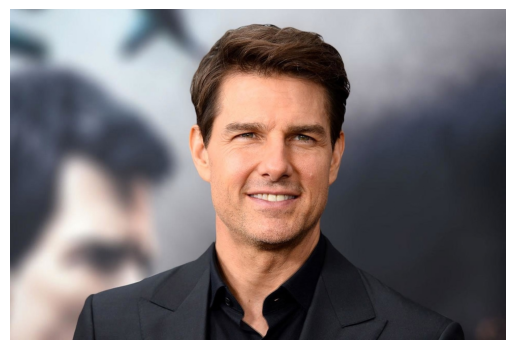

Results


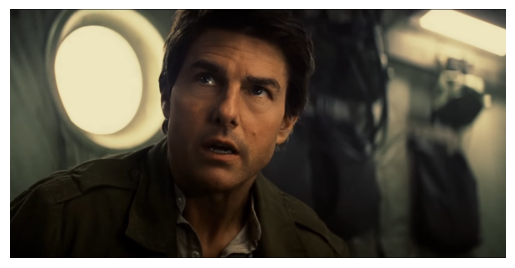

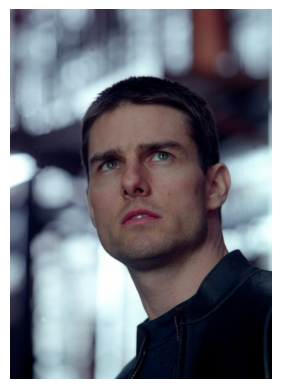

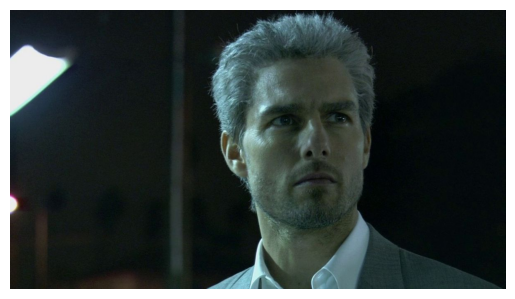

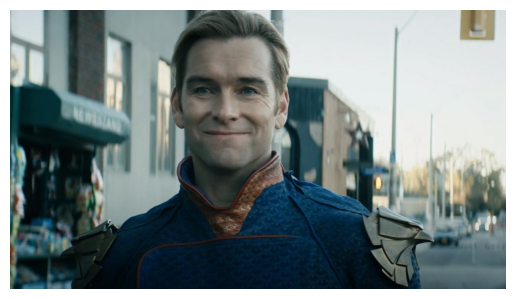

In [19]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt # type: ignore

query_image = np.array(Image.open(f"{IMAGE_FOLDER}/thomas_1.jpg"))
print("Query Image")
plt.imshow(query_image)
plt.axis('off')
plt.show()

print("Results")
retrieved = collection_images.query(query_images=[query_image], include=['data'], n_results=5)
for img in retrieved['data'][0][1:]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [21]:
retrieved['uris']

[['../../misc/images\\thomas_1.jpg',
  '../../misc/images\\thomas_5.png',
  '../../misc/images\\thomas_4.jpg',
  '../../misc/images\\thomas_3.jpg',
  '../../misc/images\\homie_4.jpg']]

In [1]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://image.tmdb.org/t/p/w500/rr7E0NoGKxvbkb89eR1GwfoYjpA.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])